In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
single_image= X_train[0]


In [ ]:
single_image.shape


(28, 28)

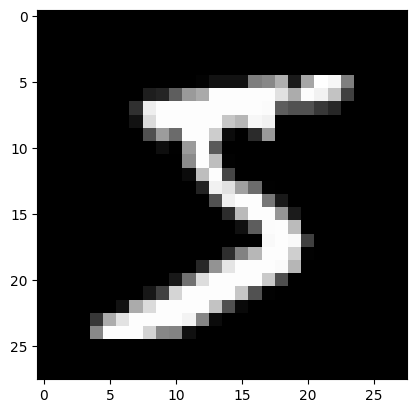

In [ ]:
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train.shape


(60000,)

In [ ]:
X_train.min()


0

In [ ]:
X_train.max()


255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()



0.0

In [ ]:
X_train_scaled.max()


1.0

In [ ]:
y_train[0]


5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)


numpy.ndarray

In [ ]:
y_train_onehot.shape


(60000, 10)

YUVASAKTHI N.C 
212222240120


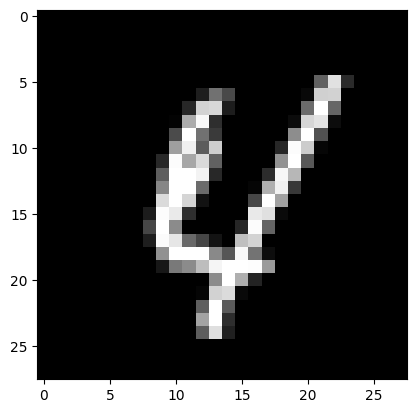

In [ ]:
single_image = X_train[700]
plt.imshow(single_image,cmap='gray')
print("YUVASAKTHI N.C \n212222240120")

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,618 (596.16 KB)

 Trainable params: 152,618 (596.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', # Loss function for multi-class classification
              optimizer='adam', # A popular optimization algorithm
              metrics=['accuracy']) # Metric to evaluate model performance

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9957 - loss: 0.0151 - val_accuracy: 0.9877 - val_loss: 0.0399
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 62ms/step - accuracy: 0.9961 - loss: 0.0115 - val_accuracy: 0.9852 - val_loss: 0.0531
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 66ms/step - accuracy: 0.9970 - loss: 0.0097 - val_accuracy: 0.9894 - val_loss: 0.0413
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.9889 - val_loss: 0.0450
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9980 - loss: 0.0064 - val_accuracy: 0.9881 - val_loss: 0.0530


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.994767,0.016491,0.9877,0.039938
1,0.995550,0.013669,0.9852,0.053090
2,0.996483,0.010974,0.9894,0.041269
3,0.996883,0.008762,0.9889,0.044957
4,0.997583,0.007453,0.9881,0.053014


YUVASAKTHI N.C 
212222240120


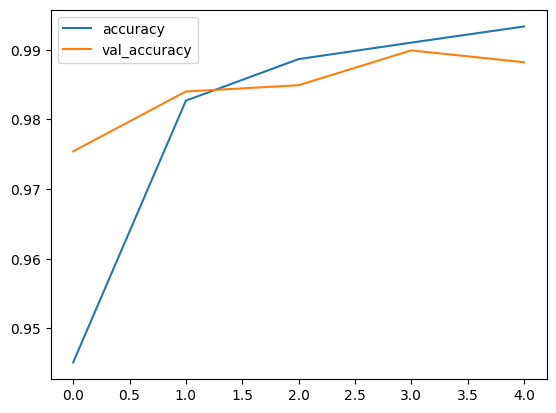

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
print("YUVASAKTHI N.C \n212222240120")

YUVASAKTHI N.C 
212222240120


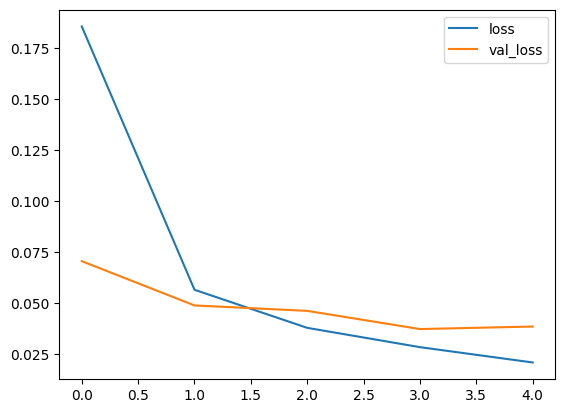

In [ ]:
metrics[['loss','val_loss']].plot()
print("YUVASAKTHI N.C \n212222240120")

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))
print("\nYUVASAKTHI N.C \n212222240120")

[[ 972    0    1    0    0    1    4    0    1    1]
 [   0 1130    1    0    1    1    0    0    2    0]
 [   2    2 1017    1    1    0    1    4    4    0]
 [   0    0    2  990    0    8    0    0    4    6]
 [   0    0    0    0  968    0    3    1    1    9]
 [   0    0    0    2    0  887    1    0    2    0]
 [   4    2    1    0    1    0  949    0    1    0]
 [   0    2    7    1    1    0    0 1010    2    5]
 [   3    1    2    0    0    0    1    1  963    3]
 [   0    1    0    0    5    2    0    2    3  996]]

YUVASAKTHI N.C 
212222240120


In [ ]:
print(classification_report(y_test,x_test_predictions))
print("\nYUVASAKTHI N.C \n212222240120")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


YUVASAKTHI N.C 
212222240120


In [ ]:
img = image.load_img('imagefour.png')

In [ ]:
type(img)


PIL.Image.Image

In [ ]:
img = image.load_img('imagefour.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
print(x_single_prediction)

[4]


YUVASAKTHI N.C 
212222240120


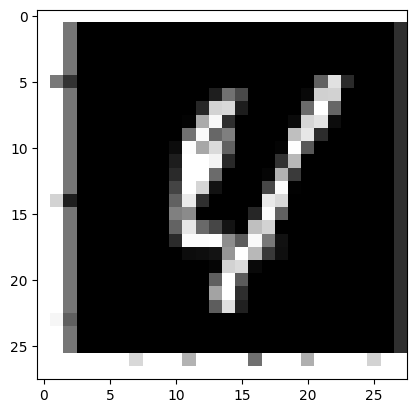

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("YUVASAKTHI N.C \n212222240120")

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
print(x_single_prediction)

[4]
